In [1]:
# 판다스 라이브러리 탑재
import pandas as pd

# 설치된 모든 라이브러리 버전 확인
pd.show_versions()

/usr/local/lib/python3.10/dist-packages/_distutils_hack/__init__.py:33: UserWarning: Setuptools is replacing distutils.
  warnings.warn("Setuptools is replacing distutils.")



INSTALLED VERSIONS
------------------
commit           : 2e218d10984e9919f0296931d92ea851c6a6faf5
python           : 3.10.12.final.0
python-bits      : 64
OS               : Linux
OS-release       : 5.15.120+
Version          : #1 SMP Wed Aug 30 11:19:59 UTC 2023
machine          : x86_64
processor        : x86_64
byteorder        : little
LC_ALL           : en_US.UTF-8
LANG             : en_US.UTF-8
LOCALE           : en_US.UTF-8

pandas           : 1.5.3
numpy            : 1.23.5
pytz             : 2023.3.post1
dateutil         : 2.8.2
setuptools       : 67.7.2
pip              : 23.1.2
Cython           : 3.0.5
pytest           : 7.4.3
hypothesis       : None
sphinx           : 5.0.2
blosc            : None
feather          : None
xlsxwriter       : None
lxml.etree       : 4.9.3
html5lib         : 1.1
pymysql          : None
psycopg2         : 2.9.9
jinja2           : 3.1.2
IPython          : 7.34.0
pandas_datareader: 0.10.0
bs4              : 4.11.2
bottleneck       : None
brotli  

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
# CSV 파일 읽어오기
raw_df = pd.read_csv('/content/drive/MyDrive/MyLecture/2023/2학기/데이터처리프로그래밍/12-2주차/owid-covid-data.csv')

In [4]:
# 원천 데이터 데이터프레임 정보 확인
raw_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 192301 entries, 0 to 192300
Data columns (total 67 columns):
 #   Column                                      Non-Null Count   Dtype  
---  ------                                      --------------   -----  
 0   iso_code                                    192301 non-null  object 
 1   continent                                   181123 non-null  object 
 2   location                                    192301 non-null  object 
 3   date                                        192301 non-null  object 
 4   total_cases                                 184750 non-null  float64
 5   new_cases                                   184508 non-null  float64
 6   new_cases_smoothed                          183334 non-null  float64
 7   total_deaths                                166260 non-null  float64
 8   new_deaths                                  166241 non-null  float64
 9   new_deaths_smoothed                         165078 non-null  float64
 

In [5]:
# 원천 데이터 상위 5개 레코드 확인
raw_df.head()

,iso_code,continent,location,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,...,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index,excess_mortality_cumulative_absolute,excess_mortality_cumulative,excess_mortality,excess_mortality_cumulative_per_million
0,AFG,Asia,Afghanistan,2020-02-24,5.0,5.0,NaN,NaN,NaN,NaN,...,NaN,NaN,37.746,0.5,64.83,0.511,NaN,NaN,NaN,NaN
1,AFG,Asia,Afghanistan,2020-02-25,5.0,0.0,NaN,NaN,NaN,NaN,...,NaN,NaN,37.746,0.5,64.83,0.511,NaN,NaN,NaN,NaN
2,AFG,Asia,Afghanistan,2020-02-26,5.0,0.0,NaN,NaN,NaN,NaN,...,NaN,NaN,37.746,0.5,64.83,0.511,NaN,NaN,NaN,NaN
3,AFG,Asia,Afghanistan,2020-02-27,5.0,0.0,NaN,NaN,NaN,NaN,...,NaN,NaN,37.746,0.5,64.83,0.511,NaN,NaN,NaN,NaN
4,AFG,Asia,Afghanistan,2020-02-28,5.0,0.0,NaN,NaN,NaN,NaN,...,NaN,NaN,37.746,0.5,64.83,0.511,NaN,NaN,NaN,NaN


In [6]:
# 1) 원하는 열 리스트 만들기
selected_columns = ['iso_code', 'location', 'date', 'total_cases', 'population']

# 2) 원하는 열로 개정된 데이터프레임 생성
revised_df = raw_df[selected_columns]

# 3) 개정된 데이터프레임 데이터 일부 확인하기
revised_df.head()

,iso_code,location,date,total_cases,population
0,AFG,Afghanistan,2020-02-24,5.0,39835428.0
1,AFG,Afghanistan,2020-02-25,5.0,39835428.0
2,AFG,Afghanistan,2020-02-26,5.0,39835428.0
3,AFG,Afghanistan,2020-02-27,5.0,39835428.0
4,AFG,Afghanistan,2020-02-28,5.0,39835428.0


In [7]:
# 열 location 값 확인하기
locations = revised_df['location']
locations

0         Afghanistan
1         Afghanistan
2         Afghanistan
3         Afghanistan
4         Afghanistan
             ...     
192296       Zimbabwe
192297       Zimbabwe
192298       Zimbabwe
192299       Zimbabwe
192300       Zimbabwe
Name: location, Length: 192301, dtype: object

In [8]:
# location 열의 유일 값 확인하기
locations.unique()

array(['Afghanistan', 'Africa', 'Albania', 'Algeria', 'Andorra', 'Angola',
       'Anguilla', 'Antigua and Barbuda', 'Argentina', 'Armenia', 'Aruba',
       'Asia', 'Australia', 'Austria', 'Azerbaijan', 'Bahamas', 'Bahrain',
       'Bangladesh', 'Barbados', 'Belarus', 'Belgium', 'Belize', 'Benin',
       'Bermuda', 'Bhutan', 'Bolivia', 'Bonaire Sint Eustatius and Saba',
       'Bosnia and Herzegovina', 'Botswana', 'Brazil',
       'British Virgin Islands', 'Brunei', 'Bulgaria', 'Burkina Faso',
       'Burundi', 'Cambodia', 'Cameroon', 'Canada', 'Cape Verde',
       'Cayman Islands', 'Central African Republic', 'Chad', 'Chile',
       'China', 'Colombia', 'Comoros', 'Congo', 'Cook Islands',
       'Costa Rica', "Cote d'Ivoire", 'Croatia', 'Cuba', 'Curacao',
       'Cyprus', 'Czechia', 'Democratic Republic of Congo', 'Denmark',
       'Djibouti', 'Dominica', 'Dominican Republic', 'Ecuador', 'Egypt',
       'El Salvador', 'Equatorial Guinea', 'Eritrea', 'Estonia',
       'Eswatini', 'Ethi

In [9]:
# 대한민국 데이터프레임 생성하기
kor_df = revised_df[revised_df.location == 'South Korea']

# 데이터 일부 확인하기
kor_df.head()

,iso_code,location,date,total_cases,population
160818,KOR,South Korea,2020-01-22,1.0,51305184.0
160819,KOR,South Korea,2020-01-23,1.0,51305184.0
160820,KOR,South Korea,2020-01-24,2.0,51305184.0
160821,KOR,South Korea,2020-01-25,2.0,51305184.0
160822,KOR,South Korea,2020-01-26,3.0,51305184.0


In [11]:
# 색인 변경하기
kor_date_index_df = kor_df.set_index('date')

# 데이터 일부 확인하기
kor_date_index_df.head()

,iso_code,location,total_cases,population
date,,,,
2020-01-22,KOR,South Korea,1.0,51305184.0
2020-01-23,KOR,South Korea,1.0,51305184.0
2020-01-24,KOR,South Korea,2.0,51305184.0
2020-01-25,KOR,South Korea,2.0,51305184.0
2020-01-26,KOR,South Korea,3.0,51305184.0


In [12]:
# 미국 데이터프레임 생성하기
usa_df = revised_df[revised_df.location == 'United States']

# 색인 변경하기
usa_date_index_df = usa_df.set_index('date')

# 값 일부 확인하기
usa_date_index_df.head()

,iso_code,location,total_cases,population
date,,,,
2020-01-22,USA,United States,1.0,332915074.0
2020-01-23,USA,United States,1.0,332915074.0
2020-01-24,USA,United States,2.0,332915074.0
2020-01-25,USA,United States,2.0,332915074.0
2020-01-26,USA,United States,5.0,332915074.0


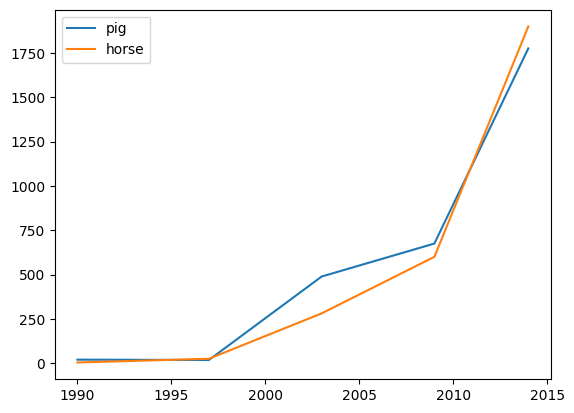

In [13]:
# 시각화 예시 실행하기
df = pd.DataFrame({
   'pig': [20, 18, 489, 675, 1776],
   'horse': [4, 25, 281, 600, 1900]
   }, index=[1990, 1997, 2003, 2009, 2014])
lines = df.plot.line()

In [14]:
# 대한민국 확잔자 수 구하기
kor_total_cases = kor_date_index_df['total_cases']
kor_total_cases

date
2020-01-22           1.0
2020-01-23           1.0
2020-01-24           2.0
2020-01-25           2.0
2020-01-26           3.0
                 ...    
2022-06-03    18153851.0
2022-06-04    18163686.0
2022-06-05    18168708.0
2022-06-06    18174880.0
2022-06-07    18188200.0
Name: total_cases, Length: 868, dtype: float64

In [15]:
# 미국 확진자 수 구하기
usa_total_cases = usa_date_index_df['total_cases']
usa_total_cases

date
2020-01-22           1.0
2020-01-23           1.0
2020-01-24           2.0
2020-01-25           2.0
2020-01-26           5.0
                 ...    
2022-06-03    84724329.0
2022-06-04    84748884.0
2022-06-05    84762022.0
2022-06-06    84882287.0
2022-06-07    85003945.0
Name: total_cases, Length: 868, dtype: float64

In [16]:
# 색인 확인하기
kor_date_index_df.index

Index(['2020-01-22', '2020-01-23', '2020-01-24', '2020-01-25', '2020-01-26',
       '2020-01-27', '2020-01-28', '2020-01-29', '2020-01-30', '2020-01-31',
       ...
       '2022-05-29', '2022-05-30', '2022-05-31', '2022-06-01', '2022-06-02',
       '2022-06-03', '2022-06-04', '2022-06-05', '2022-06-06', '2022-06-07'],
      dtype='object', name='date', length=868)

In [17]:
# 시각화용 데이터프레임 생성
final_df = pd.DataFrame({
    'KOR': kor_total_cases,
    'USA' : usa_total_cases
    }, index=kor_date_index_df.index
)

# 일부 데이터 확인
final_df.head()

,KOR,USA
date,,
2020-01-22,1.0,1.0
2020-01-23,1.0,1.0
2020-01-24,2.0,2.0
2020-01-25,2.0,2.0
2020-01-26,3.0,5.0


<Axes: xlabel='date'>

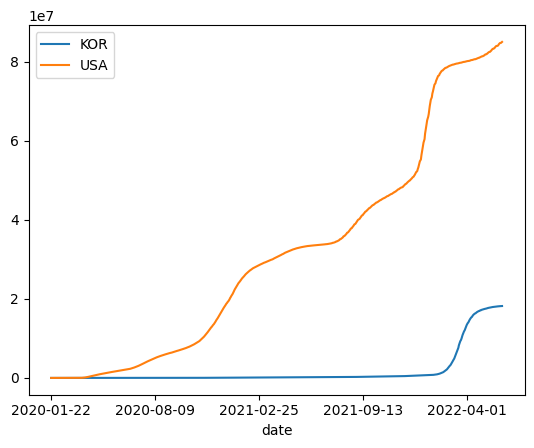

In [18]:
# 선 그래프 그리기
final_df.plot.line()

<Axes: xlabel='date'>

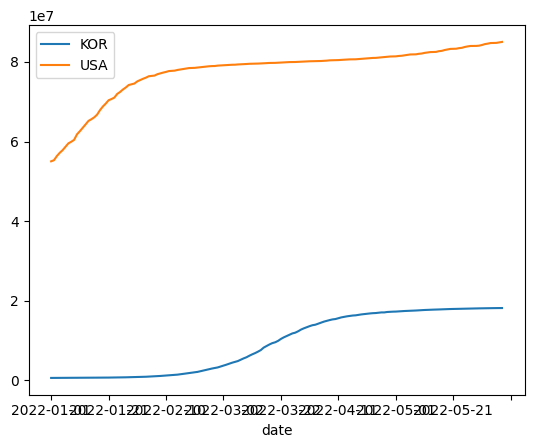

In [19]:
# 올해 그래프 그리기
final_df['2022-01-01':].plot.line()

<Axes: xlabel='date'>

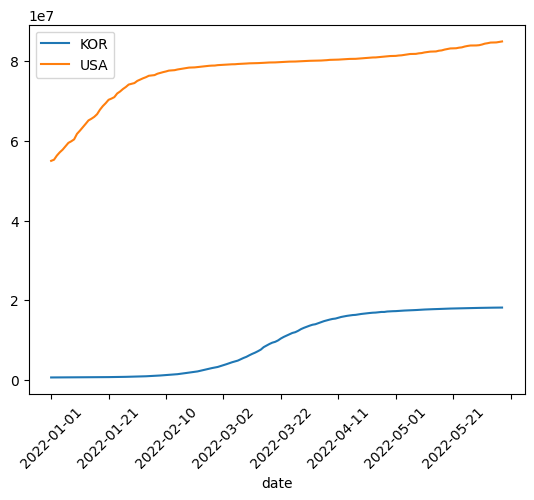

In [20]:
# x축 라벨 각도 변경하기
final_df['2022-01-01':].plot.line(rot=45)

In [21]:
# 대한민국 인구
kor_population = kor_date_index_df['population']['2020-01-22']

# 미국 인구
usa_population = usa_date_index_df['population']['2020-01-22']

print('미국 인구(', usa_population, ') / 대한민국 인구(', kor_population, ')' )

미국 인구( 332915074.0 ) / 대한민국 인구( 51305184.0 )


In [22]:
#인구 비율 구하기
rate = round((332915074.0 / 51305184.0), 2)
rate

6.49

In [23]:
# 확진자 비율을 적용한 최종 데이터프레임 생성하기
final_revised_df = pd.DataFrame({
    'KOR': kor_total_cases * rate,            # 비율 반영
    'USA' : usa_total_cases
    }, index=kor_date_index_df.index
)

# 일부 데이터 확인하기
final_revised_df.head()

,KOR,USA
date,,
2020-01-22,6.49,1.0
2020-01-23,6.49,1.0
2020-01-24,12.98,2.0
2020-01-25,12.98,2.0
2020-01-26,19.47,5.0


<Axes: xlabel='date'>

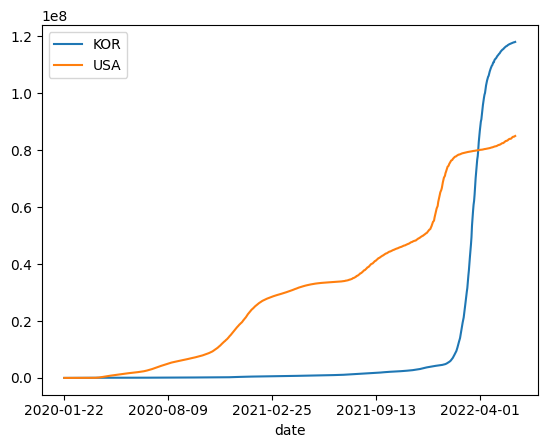

In [24]:
# 최종 전체 그래프 확인하기
final_revised_df[:].plot.line()

<Axes: xlabel='date'>

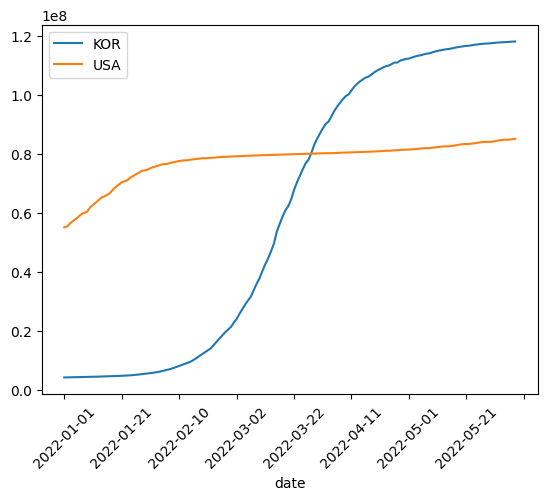

In [ ]:
# 최종 올해 그래프 확인하기
final_revised_df['2022-01-01':].plot.line(rot=45)